In [40]:
import json
import matplotlib.pyplot as plt

In [5]:
recog_set = [
    'train',
    'dev',
    'test',
]

distribution = dict()

In [28]:
for task in recog_set:
    distribution[task] = dict()
    for i in range(1, 11):
        distribution[task][f'{i}'] = 0
    distribution[task]['101'] = 0

    with open(f'./data/aishell_{task}/dataset.json') as f:
        data = json.load(f)
    
    for d in data:
        if (d['ref'] in d['token']):
            ref_index = d['token'].index(d['ref'])
            distribution[task][f'{ref_index + 1}'] += 1
        else:
            distribution[task]['101'] += 1

In [25]:
distribution['test']

{'1': 3865,
 '2': 622,
 '3': 272,
 '4': 155,
 '5': 107,
 '6': 83,
 '7': 77,
 '8': 45,
 '9': 30,
 '10': 20,
 'outofNbest': 1900}

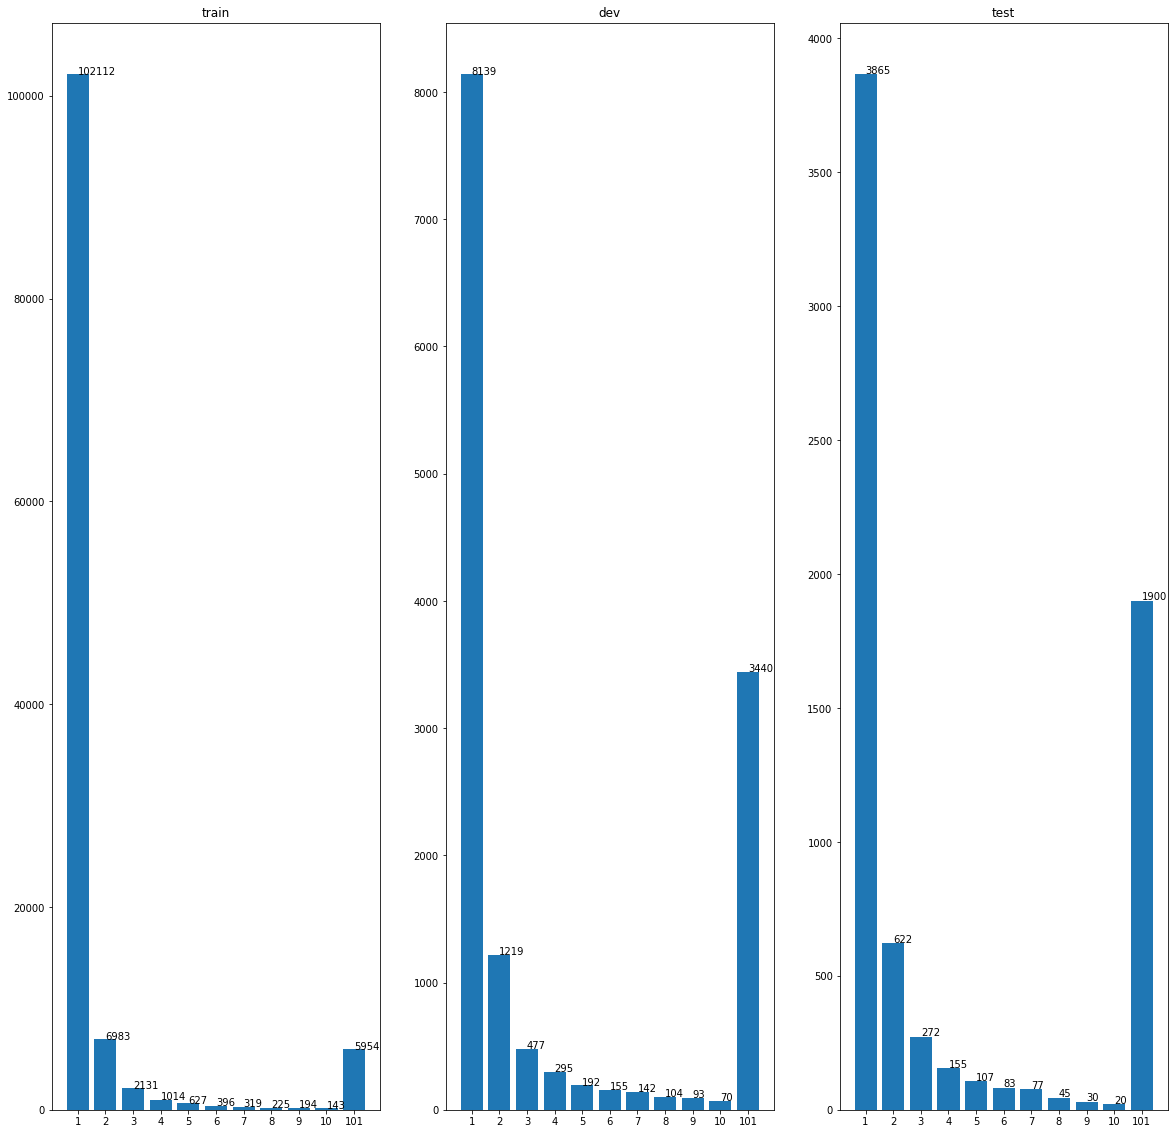

In [49]:
fig, axe = plt.subplots(1,3, figsize = (20,20))

for i, task in enumerate(recog_set):
    x_axis = list(distribution[task].keys())
    y_axis = list(distribution[task].values())
    axe[i].bar(x_axis, y_axis)
    axe[i].set_title(task)
    for j, v in enumerate(y_axis):
        axe[i].text(j , i + v + 2.5, str(v))
plt.show()